# Trending and Sentiment Analysis - Cosmetics

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
#!pip install textblob
from textblob import TextBlob

data_URL = 'https://raw.githubusercontent.com/Ariamestra/DataScience/main/Cosmetic/nyka_top_brands_cosmetics_product_reviews.csv'
df = pd.read_csv(data_URL)
print(f"Shape: {df.shape}")
df.head()

Shape: (61284, 18)


,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [17]:
print(f"Columns: {df.columns}")
print ('-'*100)

print(f"Info: {df.info()}")
print ('-'*100)

Columns: Index(['product_id', 'brand_name', 'review_id', 'review_title', 'review_text',
       'author', 'review_date', 'review_rating', 'is_a_buyer', 'pro_user',
       'review_label', 'product_title', 'mrp', 'price', 'product_rating',
       'product_rating_count', 'product_tags', 'product_url'],
      dtype='object')
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   revi

### Trend Analysis Over Time 

Analyze how the sentiments or ratings of products change over time. This might give insights into the impact of product changes, market trends, or seasonal effects.

/tmp/ipykernel_1764/3834664906.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rating = df.resample('M', on='review_date')['review_rating'].mean()


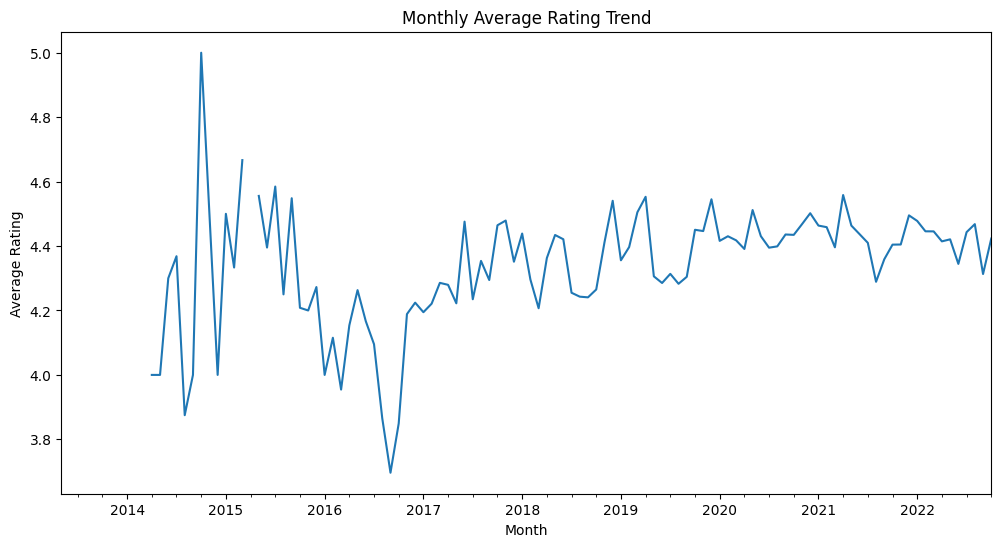

In [18]:
# Convert the 'review_date' to datetime
df['review_date'] = pd.to_datetime(df['review_date'])

# Group the reviews by month and calculate the average rating
monthly_rating = df.resample('M', on='review_date')['review_rating'].mean()
plt.figure(figsize=(12, 6))
monthly_rating.plot(title='Monthly Average Rating Trend')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

### Sentiment Analysis

Use natural language processing(NLP) to determine the sentiment of the review text. This can help understand the overall sentiment towards the products and how it correlates with the review ratings

In [20]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply function 
df['title_sentiment'] = df['review_title'].astype(str).apply(calculate_sentiment)
df['text_sentiment'] = df['review_text'].astype(str).apply(calculate_sentiment)

df[['review_title', 'title_sentiment', 'review_text', 'text_sentiment', 'review_rating']].head(50)

,review_title,title_sentiment,review_text,text_sentiment,review_rating
0,Worth buying 50g one,0.300000,Works as it claims. Could see the difference f...,0.625000,5.0
1,Best cream to start ur day,1.000000,It does what it claims . Best thing is it smoo...,0.566667,5.0
2,perfect for summers dry for winters,0.466667,I have been using this product for months now....,0.666667,4.0
3,Not a moisturizer,0.000000,"i have an oily skin, while this whip acts as a...",-0.050000,3.0
4,Average,-0.150000,It's not that good. Please refresh try for oth...,0.287500,2.0
5,not good for oily skin,-0.350000,dz product z best for dry skin ...one of olay ...,0.262963,1.0
6,All time favorite,0.500000,"This cream is just awesome, It makes my rough ...",0.300000,5.0
7,"""Good Product """,0.700000,Instantly perfect skin tone appearance.,1.000000,5.0
8,Good eye cream combo,0.700000,This eye cream combo is effective. Works on fi...,0.291667,5.0
9,"""Olay''",0.000000,"3in1 benifits, helps reduces dark spots and wr...",-0.150000,5.0
